# Logistic Regression

### setup

In [1]:
# import needed libraries
from __future__ import absolute_import, division, print_function, unicode_literals

# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
# Helper libraries

print(tf.__version__)

2.20.0


In [29]:
#setting a random seed for reproducibility
import random
random.seed(4)
tf.random.set_seed(4)
np.random.seed(4)


In [5]:
#getting the data
import json

with open('realAccountData.json', 'r') as f:
            realData = json.load(f)
with open('fakeAccountData.json', 'r') as f:
            fakeData = json.load(f)
allData = realData + fakeData #note that the data is ordered right now
random.shuffle(allData) #so this shuffles the list just in case

In [6]:
#turning into numpy arrays
numpy_real = np.array(realData)
# print(numpy_real[1]) #making sure things work
numpy_fake = np.array(fakeData)
# print(numpy_fake[1]) #making sure things work
numpy_all = np.array(allData)
# print(numpy_all[1]) #making sure things work

#and making a dataframe
allData_df = pd.DataFrame(allData)

In [8]:
cols = allData_df.shape[1]
X = allData_df.iloc[:,0:cols-1] # iloc slicing function
Y = allData_df.iloc[:,cols-1:cols]

In [11]:
#train test split being made
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# and standardizing the X data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=4)  #getting validation set



scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) #you have to do this
x_val = scaler.transform(x_val) #you have to do this



In [14]:
print (x_train.shape, y_train.shape)
print (x_val.shape, y_val.shape)
print (x_test.shape, y_test.shape)

(716, 8) (716, 1)
(179, 8) (179, 1)
(299, 8) (299, 1)


## Defining the First Neural Network (1 layer)

In [87]:
layers1 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(50, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model1 = Sequential(layers1)

model1.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, batch_size=16, epochs= 10, validation_data=(x_val, y_val))

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8687 - loss: 0.5395 - val_accuracy: 0.9162 - val_loss: 0.4287
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9050 - loss: 0.3825 - val_accuracy: 0.9050 - val_loss: 0.3340
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9134 - loss: 0.2924 - val_accuracy: 0.9106 - val_loss: 0.2820
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9218 - loss: 0.2377 - val_accuracy: 0.9050 - val_loss: 0.2546
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9316 - loss: 0.2041 - val_accuracy: 0.8994 - val_loss: 0.2398
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9372 - loss: 0.1825 - val_accuracy: 0.8939 - val_loss: 0.2311
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9385 - loss: 0.1679 - val_accuracy: 0.8994 - val_loss: 0.2247
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9427 - loss: 0.1574 - val_accuracy: 0.9050 - val_loss:

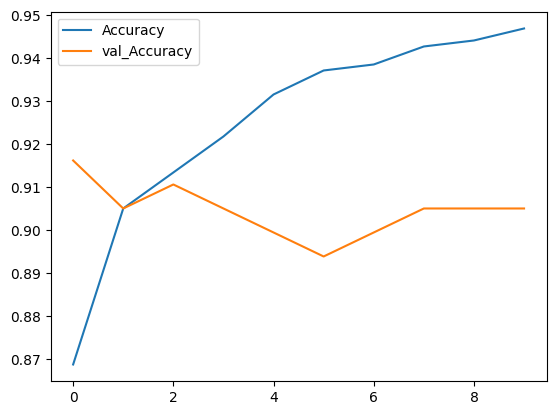

In [88]:
plt.plot(history1.history['accuracy'], label="Accuracy")
plt.plot(history1.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


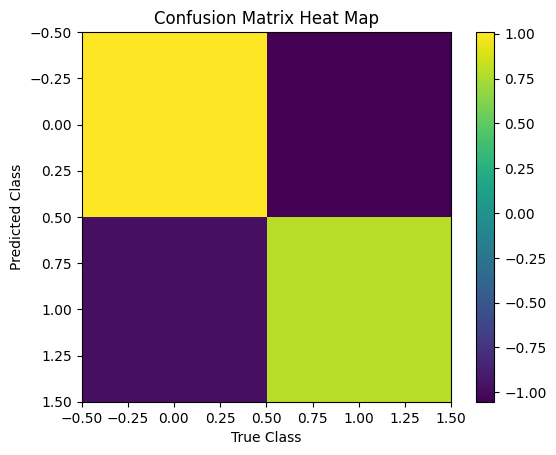

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       246
           1       0.91      0.74      0.81        53

    accuracy                           0.94       299
   macro avg       0.93      0.86      0.89       299
weighted avg       0.94      0.94      0.94       299

specificity: 0.983739837398374
recall: 0.7358490566037735
precision: 0.9069767441860465
accuracy: 0.939799331103679


In [89]:
#model 1 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

y_test_array = np.ravel(y_test)
network1_pred = model1.predict(x_test)
network1_pred = (network1_pred > 0.5).astype(int)
conf_matrix1 = confusion_matrix(y_true = y_test, y_pred = network1_pred)
conf_matrix_scaler1 = preprocessing.StandardScaler().fit(conf_matrix1)
conf_matrix_scaled1 = conf_matrix_scaler.transform(conf_matrix1)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled1)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network1_report = classification_report(y_true = y_test, y_pred = network1_pred)
print(network1_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix1.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")


#note, the low recall is not that huge of a problem, as we are trying to have as high of a precision as possible

## defining the next neural network (2 layers)

In [90]:
layers2 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(50, activation = "relu"),
    Dense(50, activation = "relu"),
    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model2 = Sequential(layers2)

model2.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, batch_size=16, epochs= 10, validation_data=(x_val, y_val))

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8687 - loss: 0.4544 - val_accuracy: 0.8771 - val_loss: 0.3348
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9120 - loss: 0.2459 - val_accuracy: 0.8994 - val_loss: 0.2327
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.1808 - val_accuracy: 0.8939 - val_loss: 0.2160
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9427 - loss: 0.1570 - val_accuracy: 0.8939 - val_loss: 0.2077
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9455 - loss: 0.1431 - val_accuracy: 0.9050 - val_loss: 0.1989
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9511 - loss: 0.1324 - val_accuracy: 0.9050 - val_loss: 0.1904
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9525 - loss: 0.1239 - val_accuracy: 0.9106 - val_loss: 0.1827
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9525 - loss: 0.1170 - val_accuracy: 0.9162 - val_loss:

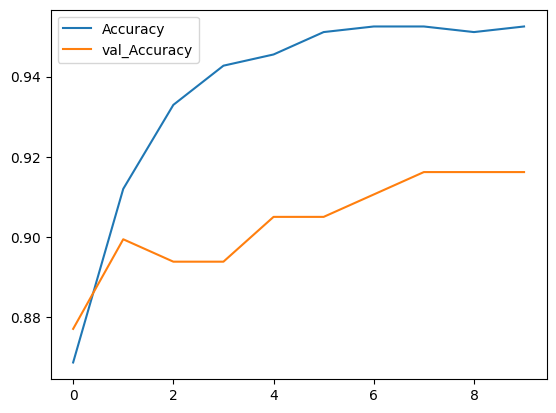

In [91]:
plt.plot(history2.history['accuracy'], label="Accuracy")
plt.plot(history2.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


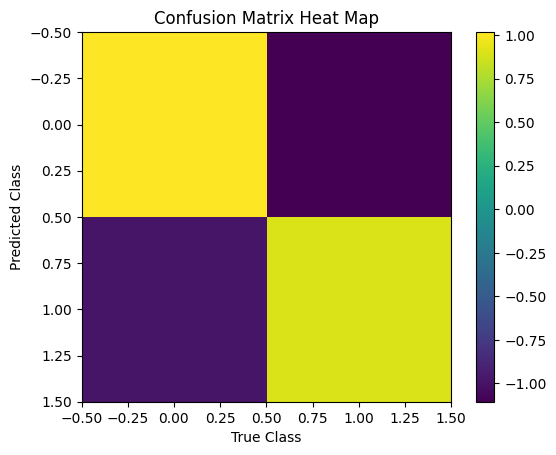

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       246
           1       0.93      0.77      0.85        53

    accuracy                           0.95       299
   macro avg       0.94      0.88      0.91       299
weighted avg       0.95      0.95      0.95       299

specificity: 0.9878048780487805
recall: 0.7735849056603774
precision: 0.9318181818181818
accuracy: 0.9498327759197325


In [92]:
#model 2 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network2_pred = model2.predict(x_test)
network2_pred = (network2_pred > 0.5).astype(int)
conf_matrix2 = confusion_matrix(y_true = y_test, y_pred = network2_pred)
conf_matrix_scaler2 = preprocessing.StandardScaler().fit(conf_matrix2)
conf_matrix_scaled2 = conf_matrix_scaler.transform(conf_matrix2)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled2)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network2_report = classification_report(y_true = y_test, y_pred = network2_pred)
print(network2_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix2.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

## defining the next neural network (5 layers, each are small)

In [93]:
layers3 = [
    Flatten(),
    #Add your first layer details here, Example Dense(50, activation="tanh"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(20, activation = "relu"),

    #Add your second layer details here
    Dense(1, activation = "sigmoid")
]

model3 = Sequential(layers3)

model3.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

history3 = model3.fit(x_train, y_train, batch_size=16, epochs= 10, validation_data=(x_val, y_val))

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7723 - loss: 0.6126 - val_accuracy: 0.8045 - val_loss: 0.5259
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8575 - loss: 0.3840 - val_accuracy: 0.8436 - val_loss: 0.3539
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8994 - loss: 0.2577 - val_accuracy: 0.8659 - val_loss: 0.2716
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9246 - loss: 0.1911 - val_accuracy: 0.8939 - val_loss: 0.2482
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.1617 - val_accuracy: 0.8883 - val_loss: 0.2430
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9427 - loss: 0.1445 - val_accuracy: 0.8939 - val_loss: 0.2400
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9497 - loss: 0.1326 - val_accuracy: 0.9106 - val_loss: 0.2278
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9525 - loss: 0.1232 - val_accuracy: 0.9106 - val_loss:

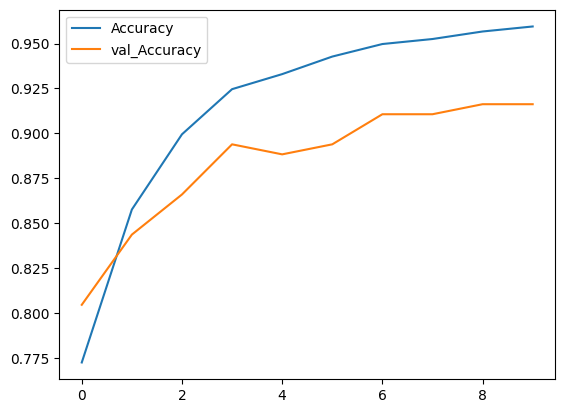

In [94]:
plt.plot(history3.history['accuracy'], label="Accuracy")
plt.plot(history3.history['val_accuracy'], label="val_Accuracy")
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


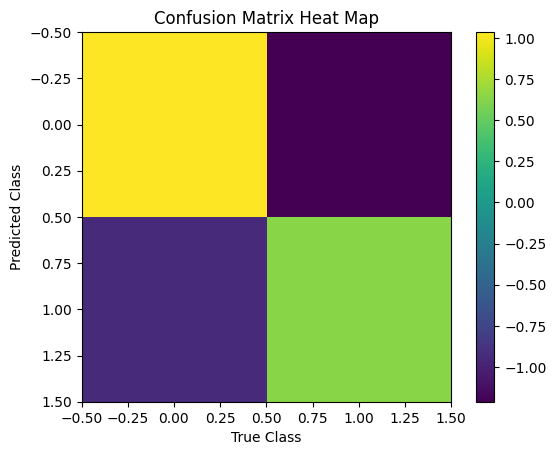

              precision    recall  f1-score   support

           0       0.94      1.00      0.96       246
           1       0.97      0.68      0.80        53

    accuracy                           0.94       299
   macro avg       0.95      0.84      0.88       299
weighted avg       0.94      0.94      0.94       299

specificity: 0.9959349593495935
recall: 0.6792452830188679
precision: 0.972972972972973
accuracy: 0.939799331103679


In [95]:
#model 3 results
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_curve, precision_score, recall_score

network3_pred = model3.predict(x_test)
network3_pred = (network3_pred > 0.5).astype(int)
conf_matrix3 = confusion_matrix(y_true = y_test, y_pred = network3_pred)
conf_matrix_scaler3 = preprocessing.StandardScaler().fit(conf_matrix3)
conf_matrix_scaled3 = conf_matrix_scaler.transform(conf_matrix3)

# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix Heat Map')
plt.imshow(conf_matrix_scaled3)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

network3_report = classification_report(y_true = y_test, y_pred = network3_pred)
print(network3_report)

#this is to double check everything
tn, fp, fn, tp = conf_matrix3.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")